In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df_test = pd.read_csv('data/test.csv')

In [4]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())

df.loc[df['Age'] < 10, 'Age'] = 0
df.loc[(df['Age'] >= 10) & (df['Age'] < 20), 'Age'] = 1
df.loc[(df['Age'] >= 20) & (df['Age'] < 30), 'Age'] = 2
df.loc[(df['Age'] >= 30) & (df['Age'] < 40), 'Age'] = 3
df.loc[(df['Age'] >= 40) & (df['Age'] < 50), 'Age'] = 4
df.loc[df['Age'] >=50, 'Age'] = 5
df_test.loc[df_test['Age'] < 10, 'Age'] = 0
df_test.loc[(df_test['Age'] >= 10) & (df_test['Age'] < 20), 'Age'] = 1
df_test.loc[(df_test['Age'] >= 20) & (df_test['Age'] < 30), 'Age'] = 2
df_test.loc[(df_test['Age'] >= 30) & (df_test['Age'] < 40), 'Age'] = 3
df_test.loc[(df_test['Age'] >= 40) & (df_test['Age'] < 50), 'Age'] = 4
df_test.loc[df_test['Age'] >=50, 'Age'] = 5

df['FamilySize'] = df['SibSp'] + df['Parch']
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']

df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())
df['Embarked'] = df['Embarked'].fillna('S')
df_test['Embarked'] = df_test['Embarked'].fillna('S')

In [5]:
df.loc[df['Sex'] == 'male', 'Sex'] = 0
df.loc[df['Sex'] == 'female', 'Sex'] = 1

In [6]:
df_test.loc[df_test['Sex'] == 'male', 'Sex'] = 0
df_test.loc[df_test['Sex'] == 'female', 'Sex'] = 1

In [7]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
df.loc[df['Embarked'] == 'S', 'Embarked'] = 0
df.loc[df['Embarked'] == 'C', 'Embarked'] = 1
df.loc[df['Embarked'] == 'Q', 'Embarked'] = 2

In [9]:
df_test.loc[df_test['Embarked'] == 'S', 'Embarked'] = 0
df_test.loc[df_test['Embarked'] == 'C', 'Embarked'] = 1
df_test.loc[df_test['Embarked'] == 'Q', 'Embarked'] = 2

In [10]:
train = df[['Survived', 'Sex', 'Age', 'FamilySize', 'Fare', 'Embarked']]
test = df_test[['Sex', 'Age', 'FamilySize', 'Fare', 'Embarked']]

train.head()

,Survived,Sex,Age,FamilySize,Fare,Embarked
0,0,0,2.0,1,7.2500,0
1,1,1,3.0,1,71.2833,1
2,1,1,2.0,0,7.9250,0
3,1,1,3.0,1,53.1000,0
4,0,0,3.0,0,8.0500,0


In [11]:
test

,Sex,Age,FamilySize,Fare,Embarked
0,0,3.0,0,7.8292,2
1,1,4.0,1,7.0000,0
2,0,5.0,0,9.6875,2
3,0,2.0,0,8.6625,0
4,1,2.0,2,12.2875,0
...,...,...,...,...,...
413,0,3.0,0,8.0500,0
414,1,3.0,0,108.9000,1
415,0,3.0,0,7.2500,0
416,0,3.0,0,8.0500,0


In [12]:
df[['Name', 'Age']].head(10)

,Name,Age
0,"Braund, Mr. Owen Harris",2.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",3.0
2,"Heikkinen, Miss. Laina",2.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3.0
4,"Allen, Mr. William Henry",3.0
5,"Moran, Mr. James",2.0
6,"McCarthy, Mr. Timothy J",5.0
7,"Palsson, Master. Gosta Leonard",0.0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2.0
9,"Nasser, Mrs. Nicholas (Adele Achem)",1.0


In [13]:
df.loc[ df['Name'].str.contains('Mr\.'), 'Name' ] = 'Mr'
df.loc[ df['Name'].str.contains('Mrs\.'), 'Name' ] = 'Mrs'
df.loc[ df['Name'].str.contains('Miss\.'), 'Name' ] = 'Miss'
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,Mr,0,2.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,Mrs,1,3.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,Miss,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,Mrs,1,3.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,Mr,0,3.0,0,0,373450,8.0500,NaN,0,0


In [14]:
df['Name'] = df['Name'].map({
    'Mr': 0,
    'Mrs': 1,
    'Miss': 2
})

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,0.0,0,2.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,1.0,1,3.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,2.0,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,1.0,1,3.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,0.0,0,3.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0.0,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0.0,0,5.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,NaN,0,0.0,3,1,349909,21.0750,NaN,0,4
8,9,1,3,1.0,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1.0,1,1.0,1,0,237736,30.0708,NaN,1,1


In [15]:
df['Name'] = df['Name'].fillna(3)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,0.0,0,2.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,1.0,1,3.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,2.0,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,1.0,1,3.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,0.0,0,3.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0.0,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0.0,0,5.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,3.0,0,0.0,3,1,349909,21.0750,NaN,0,4
8,9,1,3,1.0,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1.0,1,1.0,1,0,237736,30.0708,NaN,1,1


In [16]:
df['Name'].value_counts()

0.0    517
2.0    182
1.0    125
3.0     67
Name: Name, dtype: int64

In [17]:
df['Age'] = df['Age'].fillna( df.groupby('Name')['Age'].transform('mean') )
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,0.0,0,2.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,1.0,1,3.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,2.0,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,1.0,1,3.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,0.0,0,3.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0.0,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0.0,0,5.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,3.0,0,0.0,3,1,349909,21.0750,NaN,0,4
8,9,1,3,1.0,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1.0,1,1.0,1,0,237736,30.0708,NaN,1,1


# 미션2

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

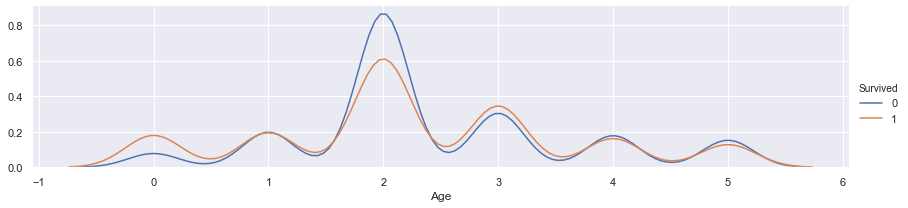

In [19]:
facet = sns.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age')
facet.add_legend()

plt.show()